# Import packages

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_theme()

# setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# show all columns on output
pd.set_option('display.max_columns', 999)

# Data Exploration

In [103]:
file_path = "/content/SalesPrediction.csv"
df = pd.read_csv(file_path)
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.00,6.57,2.91,Mega,54.73
1,13.00,9.24,2.41,Mega,46.68
2,41.00,15.89,2.91,Mega,150.18
3,83.00,30.02,6.92,Mega,298.25
4,15.00,8.44,1.41,Micro,56.59
5,29.00,9.61,1.03,Mega,105.89
6,55.00,24.89,4.27,Micro,198.68
7,31.00,17.36,2.29,Nano,108.73
8,76.00,24.65,7.13,Macro,270.19
9,13.00,0.43,2.23,Mega,48.28


---
## Information

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


---
## Describe

In [105]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.00,4568.00,4566.00,4566.00
mean,54.07,18.16,3.32,192.47
std,26.13,9.68,2.21,93.13
min,10.00,0.00,0.00,31.20
25%,32.00,10.53,1.53,112.32
50%,53.00,17.86,3.06,189.23
75%,77.00,25.65,4.81,272.51
max,100.00,48.87,13.98,364.08


In [106]:
df.describe(include = "O")

,Influencer
count,4572
unique,4
top,Mega
freq,1158


## Missing value

In [107]:
df.isna().sum().to_frame()

,0
TV,10
Radio,4
Social Media,6
Influencer,0
Sales,6


## Handle meaningless values

### TV

In [108]:
df[df["TV"].isna()]

,TV,Radio,Social Media,Influencer,Sales
13,NaN,22.35,3.03,Mega,276.17
26,NaN,34.11,4.62,Nano,342.91
46,NaN,34.86,7.78,Mega,318.97
75,NaN,6.48,0.87,Macro,91.18
99,NaN,7.64,1.55,Macro,56.19
119,NaN,30.47,6.81,Micro,336.82
141,NaN,9.16,1.10,Macro,65.26
163,NaN,38.12,6.68,Micro,328.56
183,NaN,1.29,0.40,Macro,56.55
210,NaN,17.01,5.20,Macro,208.82


### Radio

In [109]:
df[df["Radio"].isna()]

,TV,Radio,Social Media,Influencer,Sales
197,98.00,NaN,6.40,Nano,345.95
200,89.00,NaN,4.54,Micro,316.73
203,22.00,NaN,4.13,Macro,78.03
206,12.00,NaN,1.23,Micro,50.01


### Social Media

In [110]:
df[df["Social Media"].isna()]

,TV,Radio,Social Media,Influencer,Sales
182,81.00,26.43,NaN,Macro,288.65
184,25.00,0.41,NaN,Macro,92.36
186,73.00,25.34,NaN,Mega,258.36
189,89.00,29.68,NaN,Macro,320.26
192,41.00,13.14,NaN,Nano,142.63
195,34.00,12.66,NaN,Mega,117.11


### Sales

In [111]:
df[df["Sales"].isna()]

,TV,Radio,Social Media,Influencer,Sales
208,77.00,25.60,5.51,Nano,NaN
214,100.00,36.47,5.64,Mega,NaN
221,74.00,24.22,0.29,Micro,NaN
226,19.00,8.73,0.50,Mega,NaN
231,22.00,6.81,0.01,Macro,NaN
236,27.00,1.38,2.40,Nano,NaN


### Influencer

In [112]:
df["Influencer"].value_counts()

,count
Influencer,
Mega,1158
Micro,1153
Nano,1139
Macro,1122


# Data Cleaning

In [113]:
cleaned_df = df.copy()

In [114]:
cleaned_df.dropna(subset = ["TV", "Radio", "Social Media", "Sales"], inplace = True)

In [115]:
cleaned_df.isna().sum().to_frame()

,0
TV,0
Radio,0
Social Media,0
Influencer,0
Sales,0


## Compare cleaned_df to df

In [116]:
len(cleaned_df) / len(df)

0.9943132108486439

# Feature Engineering

## Histogram for numerical

In [117]:
cleaned_df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

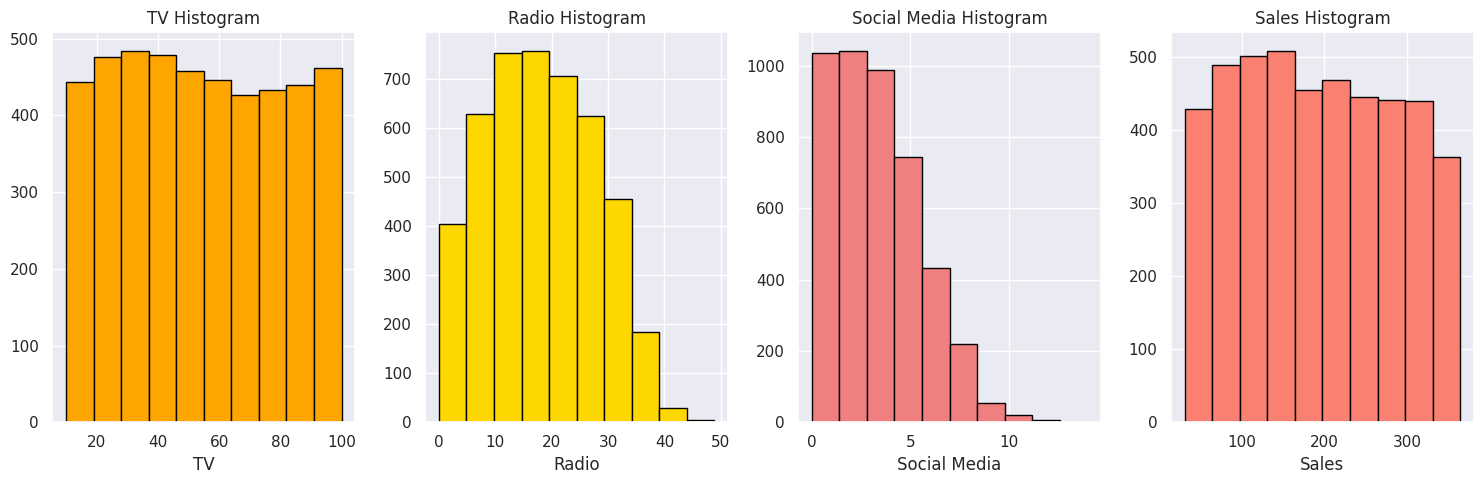

In [118]:
import random
import matplotlib.pyplot as plt

features = ["TV", "Radio", "Social Media", "Sales"]
colors = ["skyblue", "lightgreen", "salmon", "gold", "lightcoral", "mediumslateblue", "orange"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, start=1):
    random_color = random.choice(colors)
    plt.subplot(1, 4, i)
    plt.hist(cleaned_df[feature], bins=10, color=random_color, edgecolor='black')
    plt.title(f'{feature} Histogram')
    plt.xlabel(feature)

plt.tight_layout()
plt.show();

## Box plot for numerical

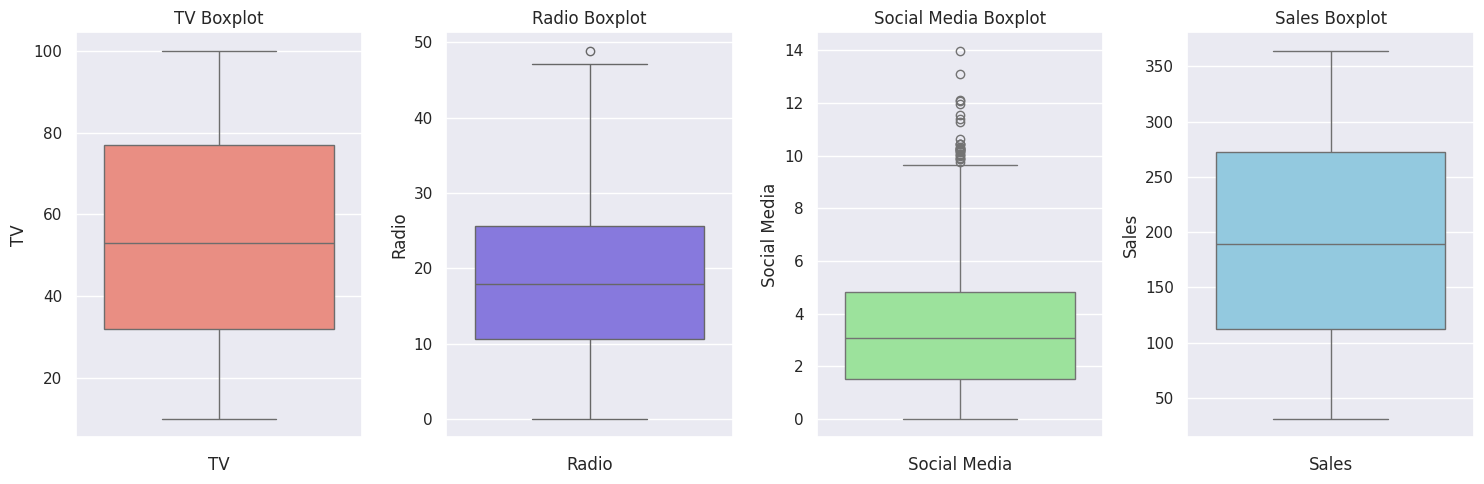

In [119]:
import random
import matplotlib.pyplot as plt

features = ["TV", "Radio", "Social Media", "Sales"]
colors = ["skyblue", "lightgreen", "salmon", "gold", "lightcoral", "mediumslateblue", "orange"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, start=1):
    random_color = random.choice(colors)
    plt.subplot(1, 4, i)
    sns.boxplot(cleaned_df[feature], color=random_color)
    plt.title(f'{feature} Boxplot')
    plt.xlabel(feature)

plt.tight_layout()
plt.show();

## Pie chart for categorical

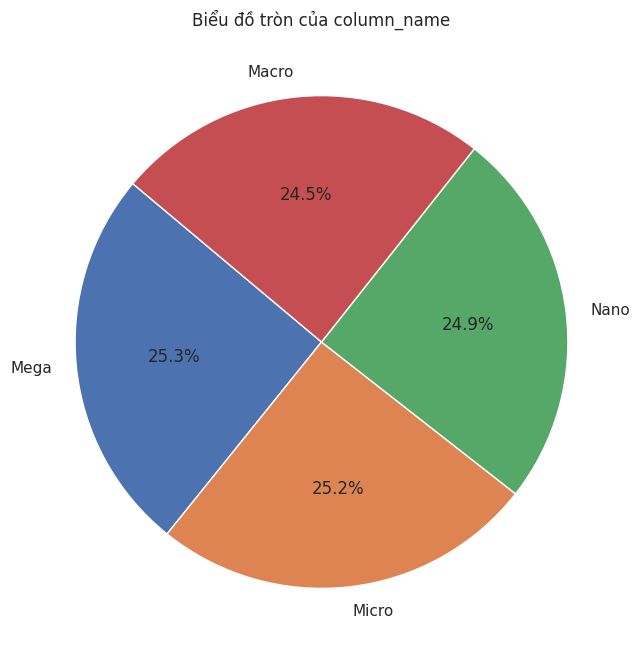

In [120]:
# Vẽ biểu đồ tròn cho cột Influencer
# Nhóm dữ liệu theo giá trị của cột và tính tổng hoặc số lượng cho mỗi nhóm
data = df['Influencer'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))  # Kích thước của biểu đồ
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ tròn của column_name')
plt.show()

## Outliers

In [121]:
# Social Media
Q1 = cleaned_df["Social Media"].quantile(0.25)
Q3 = cleaned_df["Social Media"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = (
    (cleaned_df["Social Media"] < lower_bound) |
    (cleaned_df["Social Media"] > upper_bound)
)

social_media_outlier_df = cleaned_df[condition]

In [122]:
social_media_outlier_df.describe()

,TV,Radio,Social Media,Sales
count,28.00,28.00,28.00,28.00
mean,83.07,33.17,10.75,296.28
std,13.49,5.04,1.05,47.42
min,41.00,21.67,9.75,152.51
25%,77.25,30.87,10.11,274.69
50%,86.00,33.77,10.28,305.89
75%,91.75,36.64,11.30,324.34
max,100.00,43.13,13.98,357.12


In [123]:
non_outlier_df = cleaned_df[~condition]
non_outlier_df.describe()

,TV,Radio,Social Media,Sales
count,4518.00,4518.00,4518.00,4518.00
mean,53.88,18.06,3.28,191.77
std,26.06,9.61,2.14,92.87
min,10.00,0.00,0.00,31.20
25%,32.00,10.45,1.52,112.20
50%,53.00,17.78,3.04,188.12
75%,76.00,25.46,4.78,271.13
max,100.00,48.87,9.64,364.08


---
Outlier không quá ảnh hưởng nên không cần bỏ

## Feature with target

### Numerical

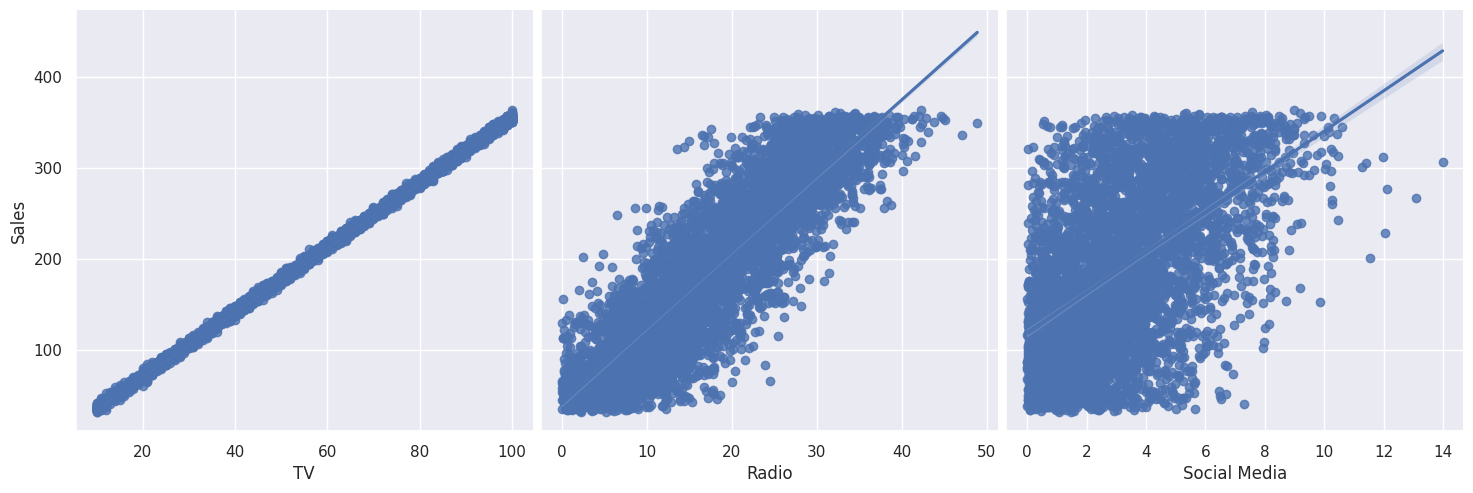

In [124]:
sns.pairplot(data = cleaned_df,
    x_vars = ['TV', 'Radio', 'Social Media'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)
plt.show()

### Categorical

In [125]:
cleaned_df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

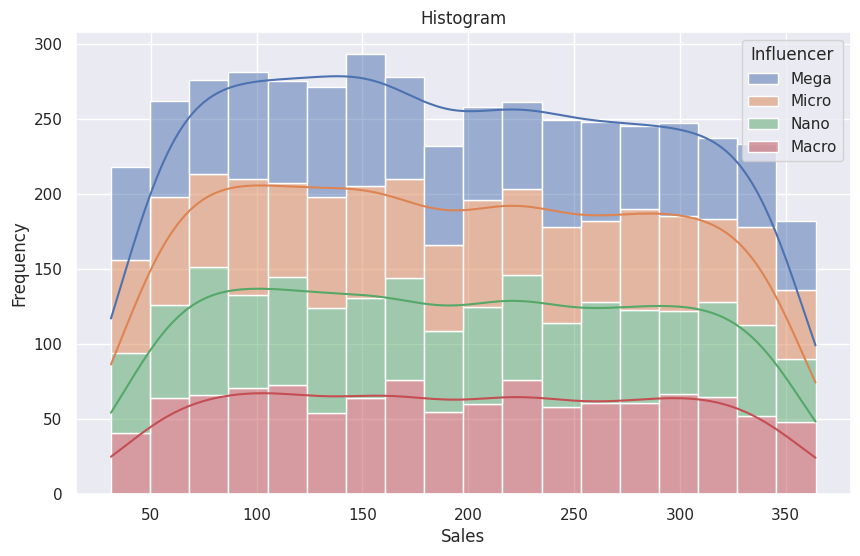

In [126]:
plt.figure(figsize=(10, 6))
# Vẽ histogram với Seaborn
sns.histplot(data=cleaned_df, x='Sales', hue='Influencer', kde=True, multiple='stack')

# Thêm tiêu đề và nhãn
plt.title('Histogram')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.show();

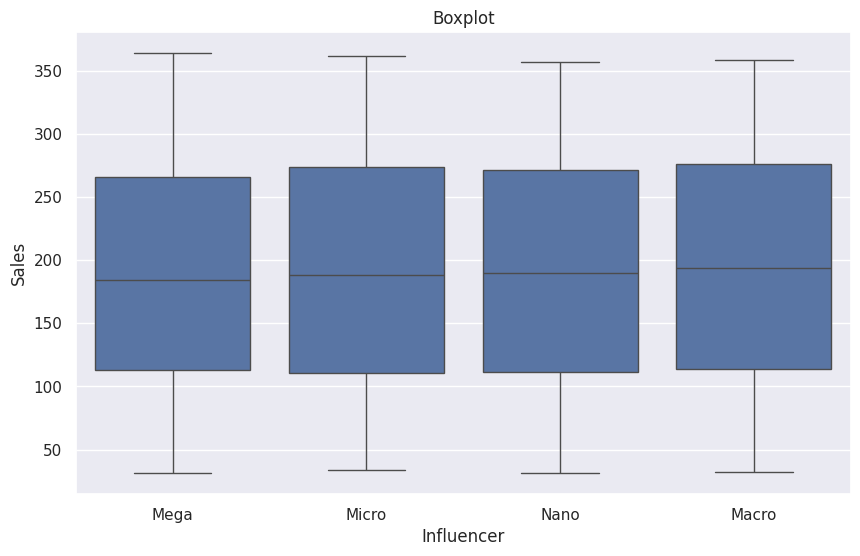

In [127]:
plt.figure(figsize=(10, 6))
# Vẽ boxplot với Seaborn
sns.boxplot(data=df, x='Influencer', y='Sales')

# Thêm tiêu đề và nhãn
plt.title('Boxplot')
plt.xlabel('Influencer')
plt.ylabel('Sales')

plt.show()


### Correlation

#### One-hot encoding

In [128]:
cleaned_df = pd.get_dummies(cleaned_df, columns = ["Influencer"])
cleaned_df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.00,6.57,2.91,54.73,False,True,False,False
1,13.00,9.24,2.41,46.68,False,True,False,False
2,41.00,15.89,2.91,150.18,False,True,False,False
3,83.00,30.02,6.92,298.25,False,True,False,False
4,15.00,8.44,1.41,56.59,False,False,True,False


In [129]:
df_corr = cleaned_df.corr()
df_corr

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.00,0.87,0.53,1.00,0.02,-0.01,-0.01,-0.00
Radio,0.87,1.00,0.61,0.87,0.01,-0.01,0.00,-0.01
Social Media,0.53,0.61,1.00,0.53,0.01,0.01,-0.01,-0.01
Sales,1.00,0.87,0.53,1.00,0.02,-0.01,-0.01,-0.00
Influencer_Macro,0.02,0.01,0.01,0.02,1.00,-0.33,-0.33,-0.33
Influencer_Mega,-0.01,-0.01,0.01,-0.01,-0.33,1.00,-0.34,-0.34
Influencer_Micro,-0.01,0.00,-0.01,-0.01,-0.33,-0.34,1.00,-0.34
Influencer_Nano,-0.00,-0.01,-0.01,-0.00,-0.33,-0.34,-0.34,1.00


In [130]:
# ones_like can build a matrix of boolean (True, False) with the same shape as our data
ones_corr  = np.ones_like(df_corr,dtype=bool)

In [131]:
ones_corr.shape, df_corr.shape

((8, 8), (8, 8))

In [132]:
# np. triu: return only upper triangle matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

In [133]:
adjusted_mask = mask[1:,:-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False]])

In [134]:
adjusted_df_corr = df_corr.iloc[1:,:-1]

In [135]:
adjusted_df_corr

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro
Radio,0.87,1.00,0.61,0.87,0.01,-0.01,0.00
Social Media,0.53,0.61,1.00,0.53,0.01,0.01,-0.01
Sales,1.00,0.87,0.53,1.00,0.02,-0.01,-0.01
Influencer_Macro,0.02,0.01,0.01,0.02,1.00,-0.33,-0.33
Influencer_Mega,-0.01,-0.01,0.01,-0.01,-0.33,1.00,-0.34
Influencer_Micro,-0.01,0.00,-0.01,-0.01,-0.33,-0.34,1.00
Influencer_Nano,-0.00,-0.01,-0.01,-0.00,-0.33,-0.34,-0.34


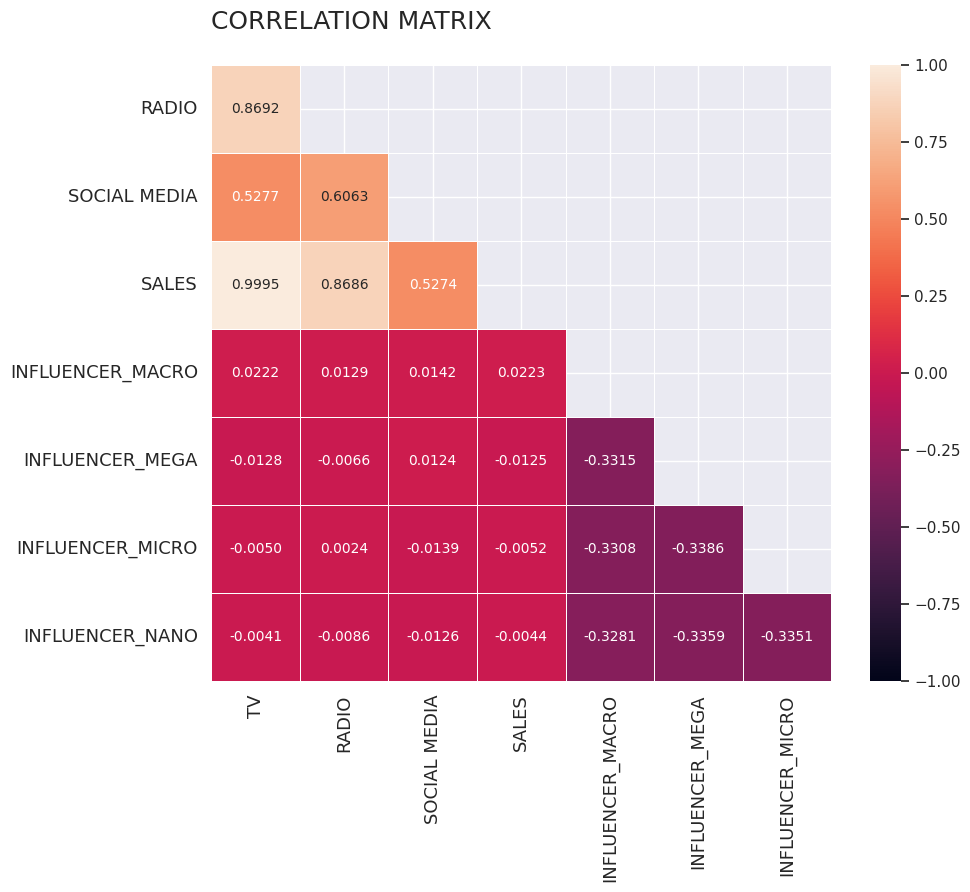

In [136]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(data= adjusted_df_corr, mask=adjusted_mask,
            annot=True, annot_kws={"fontsize":10}, fmt=".4f",
            vmin=-1, vmax=1,
            linecolor='white', linewidths=0.5);

yticks = [i.upper() for i in adjusted_df_corr.index]
xticks = [i.upper() for i in adjusted_df_corr.columns]

ax.set_yticklabels(yticks, rotation=0, fontsize=13);
ax.set_xticklabels(xticks, rotation=90, fontsize=13);
title = 'CORRELATION MATRIX\n'
ax.set_title(title, loc='left', fontsize=18);

# Train & Test Split

In [154]:
X = cleaned_df.drop(columns = ["Sales"])
y = cleaned_df["Sales"]

In [155]:
from sklearn.model_selection import StratifiedShuffleSplit

n_group = 100
grp = pd.cut(y, n_group, labels=list(range(n_group)))

# Khởi tạo StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=40)

# Chia dữ liệu thành tập train và test
for train_index, test_index in sss.split(X, grp):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)

Kích thước tập train: (3045, 7)
Kích thước tập test: (1501, 7)


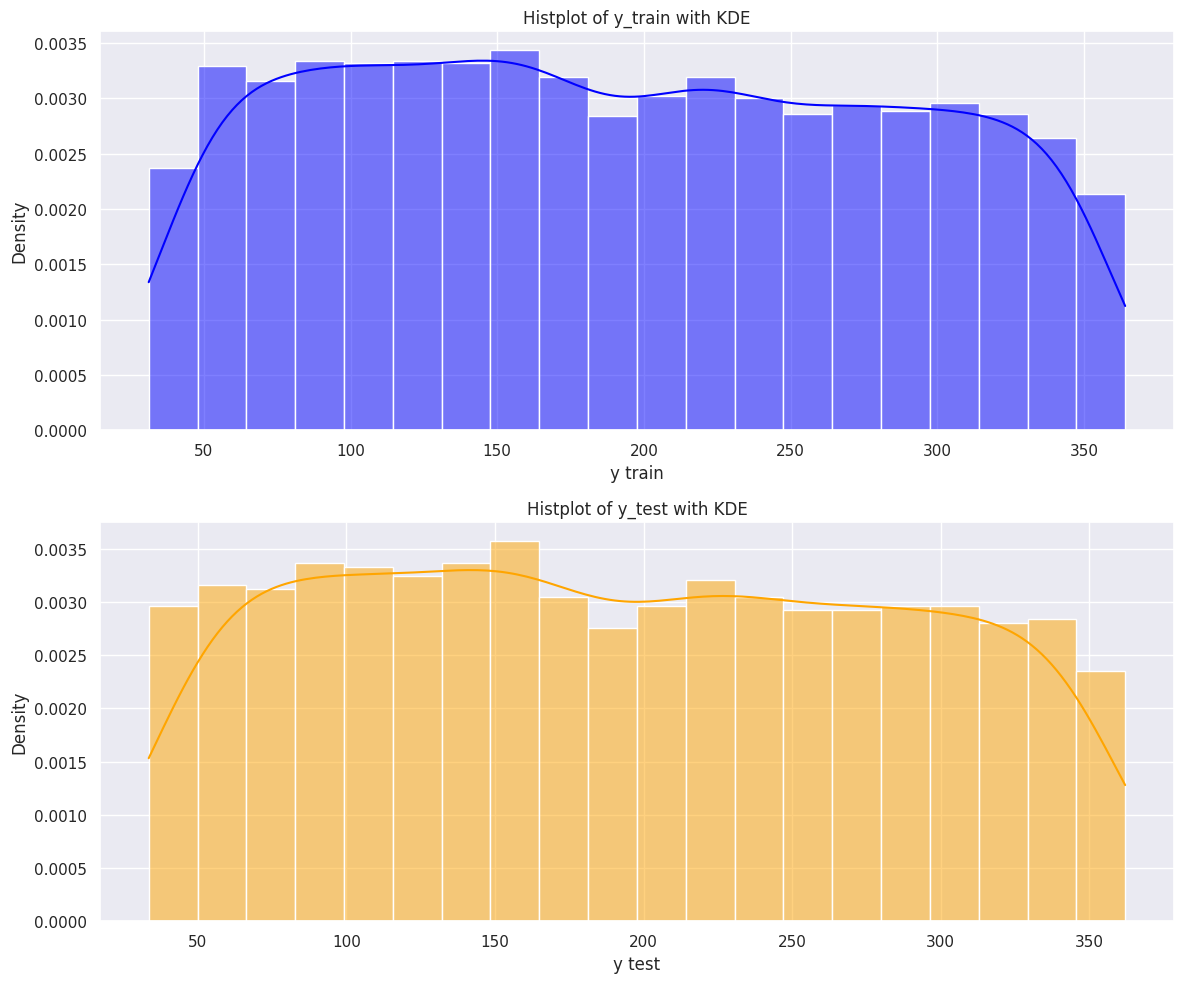

In [156]:
plt.figure(figsize=(12, 10))

# Subplot cho y_train
plt.subplot(2, 1, 1)
sns.histplot(y_train, kde=True, color='blue', stat="density", bins=20)
plt.title('Histplot of y_train with KDE')
plt.xlabel('y train')
plt.ylabel('Density')

# Subplot cho y_test
plt.subplot(2, 1, 2)
sns.histplot(y_test, kde=True, color='orange', stat="density", bins=20)
plt.title('Histplot of y_test with KDE')
plt.xlabel('y test')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Feature Scaling

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [158]:
X_train_processed.shape

(3045, 7)

In [159]:
X_test_processed = scaler.transform(X_test)

In [160]:
X_test_processed.shape

(1501, 7)

# Linear Regression

In [161]:
from sklearn.metrics import r2_score

In [162]:
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0]
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data]
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

        # Initial weights
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)**2
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        try:
            y_pred = X_data.dot(self.theta)
        except:
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            loss_grd = 2*(y_pred-self.y_target)/self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            if (epoch % 50) == 0:
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [163]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0 - Loss: 45606.93668793299
Epoch: 50 - Loss: 48.29161292174227
Epoch: 100 - Loss: 11.9183465745376
Epoch: 150 - Loss: 8.967132701985827
Epoch: 200 - Loss: 8.727592899231851


{'loss': 515.8279085034468,
 'weight': array([[ 1.92331250e+02],
        [ 9.28606920e+01],
        [ 7.27388268e-03],
        [-1.18426861e-03],
        [ 2.80474178e-01],
        [ 2.68838755e-01],
        [ 2.49924236e-01],
        [ 2.69215691e-01]])}

In [164]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

0.9990006271734022

## SKlearn

In [165]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)

LinearRegression()

In [166]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

0.9990003883770541

# Polynomial Regression

## Create polynomial features

In [167]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T

In [168]:
X_train_poly = create_polynomial_features(X_train_processed, degree=2)
X_train_poly

array([[-1.07436571,  1.15426167, -0.87435565, ...,  0.35574354,
        -0.57267324,  0.32795464],
       [-1.41936978,  2.01461056, -0.87313984, ...,  2.81101377,
        -0.57267324,  0.32795464],
       [-0.19268864,  0.03712891,  0.04171468, ...,  0.35574354,
         1.74619647,  3.04920213],
       ...,
       [ 1.18732763,  1.4097469 ,  0.0626194 , ...,  0.35574354,
        -0.57267324,  0.32795464],
       [ 0.19064921,  0.03634712,  0.04010291, ...,  2.81101377,
        -0.57267324,  0.32795464],
       [ 0.9956587 ,  0.99133625,  0.77385595, ...,  0.35574354,
        -0.57267324,  0.32795464]])

In [169]:
X_test_poly = create_polynomial_features(X_test_processed, degree=2)
X_test_poly

array([[ 1.11066006,  1.23356577,  1.79867881, ...,  2.81101377,
        -0.57267324,  0.32795464],
       [-1.34270221,  1.80284921, -1.62181172, ...,  0.35574354,
         1.74619647,  3.04920213],
       [-0.19268864,  0.03712891, -0.07695455, ...,  0.35574354,
        -0.57267324,  0.32795464],
       ...,
       [-0.34602379,  0.11973246, -1.24467339, ...,  0.35574354,
        -0.57267324,  0.32795464],
       [-1.38103599,  1.90726041, -1.52685565, ...,  0.35574354,
        -0.57267324,  0.32795464],
       [-0.46102514,  0.21254418, -0.2976824 , ...,  0.35574354,
         1.74619647,  3.04920213]])

In [170]:
X_train_poly.shape, X_test_poly.shape

((3045, 14), (1501, 14))

In [171]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [172]:
preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9989996584343795

## Using Sklearn

In [173]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_processed)

In [174]:
X_test_poly = poly_features.transform(X_test_processed)

In [175]:
X_train_poly.shape, X_test_poly.shape

((3045, 36), (1501, 36))

In [176]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [177]:
preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9987187360026599

## Custom polynomial features

In [178]:
X_train_processed[:, 2:3]

array([[-1.08625722],
       [-1.2341842 ],
       [ 0.824373  ],
       ...,
       [ 1.04344574],
       [-0.75484922],
       [-0.47439373]])

In [179]:
x_train_poly = create_polynomial_features(X_train_processed[:, 2:3], degree=2)
x_train_poly

array([[-1.08625722,  1.17995474],
       [-1.2341842 ,  1.52321065],
       [ 0.824373  ,  0.67959084],
       ...,
       [ 1.04344574,  1.08877901],
       [-0.75484922,  0.56979735],
       [-0.47439373,  0.22504942]])

In [180]:
X_train_poly = np.hstack((X_train_processed, x_train_poly[:, 1:]))
X_train_poly

array([[-1.07436571, -0.87435565, -1.08625722, ..., -0.59644241,
        -0.57267324,  1.17995474],
       [-1.41936978, -0.87313984, -1.2341842 , ...,  1.67660782,
        -0.57267324,  1.52321065],
       [-0.19268864,  0.04171468,  0.824373  , ..., -0.59644241,
         1.74619647,  0.67959084],
       ...,
       [ 1.18732763,  0.0626194 ,  1.04344574, ..., -0.59644241,
        -0.57267324,  1.08877901],
       [ 0.19064921,  0.04010291, -0.75484922, ...,  1.67660782,
        -0.57267324,  0.56979735],
       [ 0.9956587 ,  0.77385595, -0.47439373, ..., -0.59644241,
        -0.57267324,  0.22504942]])

In [181]:
x_test_poly = create_polynomial_features(X_test_processed[:, 2:3], degree=2)
X_test_poly = np.hstack((X_test_processed, x_test_poly[:, 1:]))
X_test_poly

array([[ 1.11066006e+00,  1.79867881e+00,  2.51984950e+00, ...,
         1.67660782e+00, -5.72673244e-01,  6.34964152e+00],
       [-1.34270221e+00, -1.62181172e+00,  9.99912995e-01, ...,
        -5.96442406e-01,  1.74619647e+00,  9.99825998e-01],
       [-1.92688643e-01, -7.69545528e-02,  6.95992846e-02, ...,
        -5.96442406e-01, -5.72673244e-01,  4.84406042e-03],
       ...,
       [-3.46023785e-01, -1.24467339e+00, -3.23812818e-01, ...,
        -5.96442406e-01, -5.72673244e-01,  1.04854741e-01],
       [-1.38103599e+00, -1.52685565e+00, -1.09606438e+00, ...,
        -5.96442406e-01, -5.72673244e-01,  1.20135713e+00],
       [-4.61025141e-01, -2.97682402e-01, -1.23118950e+00, ...,
        -5.96442406e-01,  1.74619647e+00,  1.51582758e+00]])

In [182]:
X_train_poly.shape, X_test_poly.shape

((3045, 8), (1501, 8))

In [183]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [184]:
preds = poly_model.predict(X_test_poly)
r2_score(y_test, preds)

0.999000445614233

In [189]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# Khởi tạo tất cả các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(eval_metric="rmse", use_label_encoder=False),
    "CatBoost": CatBoostRegressor(verbose=0),
    "LightGBM": LGBMRegressor()
}

In [190]:
# Tạo DataFrame để lưu trữ kết quả
results = []

# Chạy và đánh giá từng mô hình
for model_name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    # Dự đoán trên tập test
    y_pred = model.predict(X_test)
    # Tính toán các chỉ số đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Thêm kết quả vào list
    results.append({"Model": model_name, "MSE": mse, "R2 Score": r2})

# Chuyển đổi kết quả sang DataFrame và sắp xếp theo R2 Score
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)

# Hiển thị bảng kết quả
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 3045, number of used features: 7
[LightGBM] [Info] Start training from score 192.331250


,Model,MSE,R2 Score
1,Ridge Regression,8.68,1.00
0,Linear Regression,8.68,1.00
2,Lasso Regression,8.68,1.00
5,Gradient Boosting,8.97,1.00
11,LightGBM,9.39,1.00
10,CatBoost,10.13,1.00
4,Random Forest,10.93,1.00
9,XGBoost,11.25,1.00
8,KNeighbors Regressor,12.33,1.00
3,Decision Tree,18.42,1.00


# Stacking

In [191]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Định nghĩa các mô hình cơ sở
base_models = [
    ('random_forest', RandomForestRegressor()),
    ('gradient_boosting', GradientBoostingRegressor()),
    ('xgboost', XGBRegressor(eval_metric="rmse", use_label_encoder=False)),
    ('lightgbm', LGBMRegressor())
]

# Định nghĩa mô hình meta (mô hình tổng hợp) - sử dụng LinearRegression
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(),
    cv=5
)

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình Stacking trên tập test
y_pred_stack = stacking_model.predict(X_test)
mse_stack = mean_squared_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:00:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 3045, number of used features: 7
[LightGBM] [Info] Start training from score 192.331250


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:00:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 2436, number of used features: 7
[LightGBM] [Info] Start training from score 191.917724
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 2436, number of used features: 7
[LightGBM] [Info] Start training from score 191.886291
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of test

In [192]:
print(f"Stacking Model MSE: {mse_stack:.4f}")
print(f"Stacking Model R2 Score: {r2_stack:.4f}")

Stacking Model MSE: 8.9560
Stacking Model R2 Score: 0.9990
